# Task 2 Supervided learning Logistic regession algorithm
---

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # “pd” is an alias for pandas
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pltb
import seaborn as sns
my_dataset = pd.read_csv("mat.csv")
my_working_dataset = my_dataset[["age","traveltime","studytime","failures","famrel","freetime","goout","Dalc","Walc","health","absences","Grade","Pass/Fail"]]
my_class_labels_coded = preprocessing.LabelEncoder()
my_class_labels_coded.fit(my_working_dataset['Pass/Fail'])

LabelEncoder()

In [13]:
my_working_dataset2 = my_dataset[["age", "traveltime", "studytime", "failures", "freetime", "absences"]]
x_train, x_test, y_train, y_test = train_test_split(my_working_dataset2,my_working_dataset['Pass/Fail'], test_size=0.1, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression() # initiate the learning model
model.fit(x_train, y_train) # train the model

LogisticRegression()

In [16]:
print(model.score(x_train,y_train)) 
#model.predict(x_train)
#model.predict_proba(x_train)

0.6394366197183099


              precision    recall  f1-score   support

           0       1.00      0.37      0.54        19
           1       0.64      1.00      0.78        21

    accuracy                           0.70        40
   macro avg       0.82      0.68      0.66        40
weighted avg       0.81      0.70      0.66        40



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

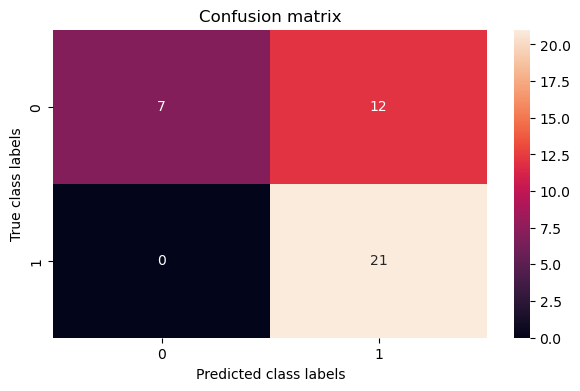

In [17]:
y_predictions = model.predict(x_test)
print(classification_report(my_class_labels_coded.inverse_transform(y_test), my_class_labels_coded.inverse_transform(y_predictions)))
my_confusion_matrix = confusion_matrix(my_class_labels_coded.inverse_transform(y_test), my_class_labels_coded.inverse_transform(y_predictions))
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax)
ax.set_xlabel('Predicted class labels')
ax.set_ylabel('True class labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(my_class_labels_coded.classes_)
ax.yaxis.set_ticklabels(my_class_labels_coded.classes_)

# Task 2 Supervided learning kNN algorithm

In [18]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.pipeline import Pipeline

### Normal kNN

In [19]:
knn = KNeighborsClassifier(n_neighbors=4) #numbers of neighbours to be checked
knn.fit(x_train, y_train) #Train the model
print(knn.score(x_test, y_test)) #performance test based on the test data
#knn.predict(x_test)

0.6


### Find optimal K value

Text(0, 0.5, 'Accuracy Score')

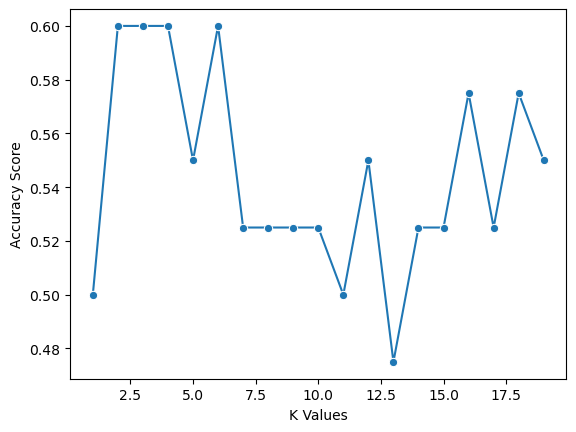

In [20]:
from sklearn.preprocessing import StandardScaler

k_values = [i for i in range (1,20)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train) #Train the model
    scores.append(knn.score(x_test, y_test)) 
    
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [21]:
knn = KNeighborsClassifier(n_neighbors=4) #numbers of neighbours to be checked
knn.fit(x_train, y_train) #Train the model
print(knn.score(x_test, y_test)) #performance test based on the test data

0.6


              precision    recall  f1-score   support

           0       0.57      0.63      0.60        19
           1       0.63      0.57      0.60        21

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

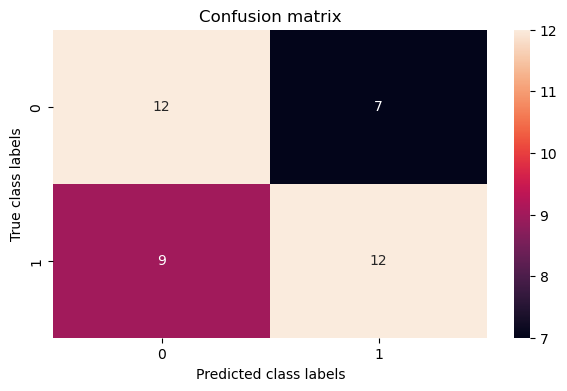

In [22]:
y_predictions = knn.predict(x_test)
print(classification_report(my_class_labels_coded.inverse_transform(y_test), my_class_labels_coded.inverse_transform(y_predictions)))
my_confusion_matrix = confusion_matrix(my_class_labels_coded.inverse_transform(y_test), my_class_labels_coded.inverse_transform(y_predictions))
fig, ax = pltb.subplots(figsize=(7,4))
sns.heatmap(my_confusion_matrix, annot = True, fmt = 'g', ax = ax)
ax.set_xlabel('Predicted class labels')
ax.set_ylabel('True class labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(my_class_labels_coded.classes_)
ax.yaxis.set_ticklabels(my_class_labels_coded.classes_)